In [1]:
from wb.dataset import FileWBDataset, NumpyWBDataset
import matplotlib.pyplot as plt

In [2]:
dataset = FileWBDataset("D:/lecomtje/Repositories/MPU/data/wb/100_1024/wind_bench.parquet")


Tower top fore-aft acceleration ay [m/s2]
(8, 1024)


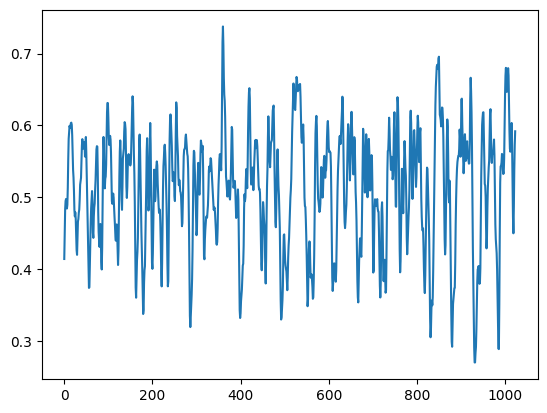

In [3]:
idx = 0

X, y = dataset[0]
print(FileWBDataset.x_columns[idx])
print(X.shape)
plt.plot(X[idx,:])



{'count': 12000000.0, 'mean': -3.732385818133257e-07, 'std': 0.1175451058459768, 'min': -0.8967088086, '25%': -0.07215977105999999, '50%': 7.251252000000028e-05, '75%': 0.07217759763, 'max': 0.8616838365799999}


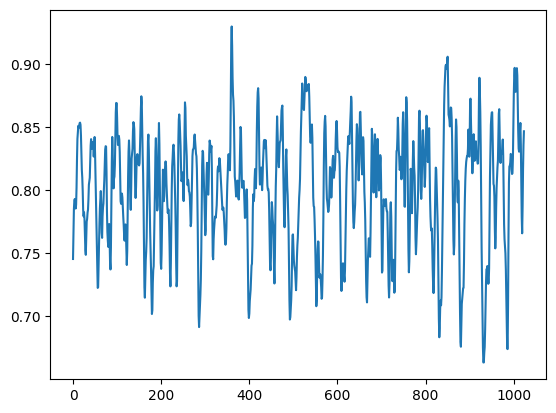

In [7]:
import json
from wb.dataset.normalize import MinMax

with open("D:/lecomtje/Repositories/MPU/data/wb/stats.json") as f:
    stats = json.load(f)


print(stats[FileWBDataset.x_columns[idx]])

normalizer = MinMax(stats, FileWBDataset.x_columns, FileWBDataset.y_columns)
X, y = dataset[0]
normalizer(X, y)
plt.plot(X[idx,:])


(8, 1024)


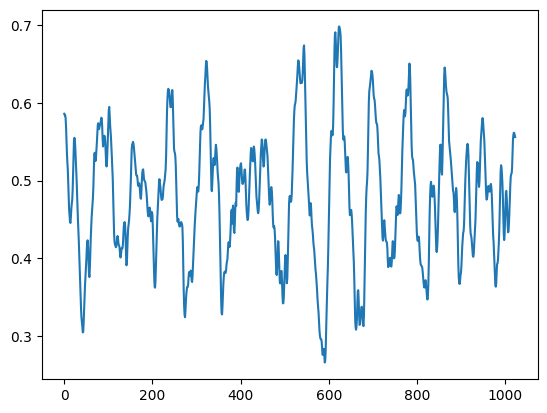

In [8]:
npy_dataset = NumpyWBDataset("D:/lecomtje/Repositories/MPU/data/wb/100_1024/")

X, y = npy_dataset[0]
print(X.shape)
plt.plot(X[idx,:])


In [ ]:
import pyarrow.parquet as pq
import json

from wb.dataset.s3 import S3
from wb.dataset import WBDataset

def extract_columns(columns):
     with S3() as s3:
        fs = s3.filesystem
        table = pq.read_table("mpu/wind_bench.parquet", filesystem=fs, columns=columns )
        return table.to_pandas()


extract_columns("")


train dataset (size) 900
X_test : (8, 12000)
y_test : (3, 12000)


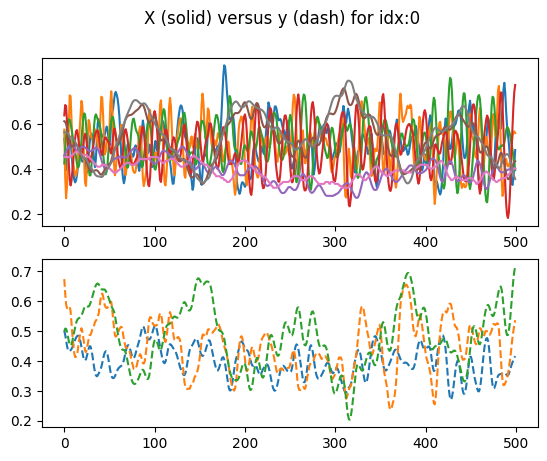

In [5]:

import matplotlib.pyplot as plt

from wb.utils.config import Config
from wb.dataset import FileWBDataset
from wb.virtual.context import Context

dataset = "/R11-data/mpu/wind_bench.parquet"
idx = 0 # indice dans le dataset
indices = [0, 2, 4] 
ratio = 0.9
span=[1000, 1500]

dataset = FileWBDataset(
            dataset, 
            train_flag=True, 
            train_test_ratio=ratio,
            indices=indices
            )

print(f"train dataset (size) {len(dataset)}")

X_idx, y_idx = dataset[idx]

print(f"X_test : {X_idx.shape}")
print(f"y_test : {y_idx.shape}")

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle( f"X (solid) versus y (dash) for idx:{idx}")

for i in range(X_idx.shape[0]):
    ax1.plot(X_idx[i, span[0]:span[1]])

for i in range(y_idx.shape[0]):
    ax2.plot(y_idx[i, span[0]:span[1]], "--")

    